/tmp/ipykernel_1059506/3730081509.py:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.multiply(data_pm, 15304)


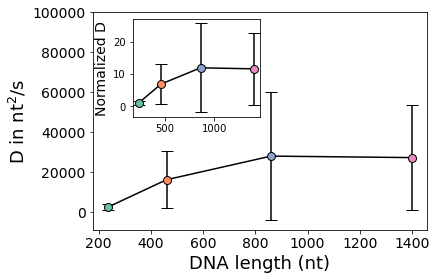

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load the data from files
dmod1 = np.loadtxt('diff_com_235.txt')
dmod2 = np.loadtxt('diff_com_460.txt')
dmod3 = np.loadtxt('diff_com_860.txt')
dmod4 = np.loadtxt('diff_com_1400.txt')


# Combine the data into a list
data_pm = [dmod1, dmod2, dmod3, dmod4]
data = np.multiply(data_pm, 15304)
#num = max(dmod4)
#print(num)
#data = np.divide(data_n, num)
import matplotlib.pyplot as plt

means = []
stds = []

for item in data:
    mean_d = np.mean(item)
    std_d = np.std(item)
    means.append(mean_d)
    stds.append(std_d)
num = min(means) 

means_mod = []
stds_mod = []

for i in range(len(means)):
    a = means[i]/num
    b = stds[i]/num
    means_mod.append(a)
    stds_mod.append(b)


x = [235, 460, 860, 1400]

fig, ax = plt.subplots()
#ax.errorbar(x, means, yerr=stds, capsize=6, fmt='o-', color= 'coral', markeredgecolor='black', ecolor='black', markersize=8)

#axins = ax.inset_axes([0.12, 0.5, 0.38, 0.47]) # specify the position and size of the inset plot
#axins.errorbar(x, means_mod, yerr=stds_mod, capsize=6, fmt='o-', color= 'coral', markeredgecolor='black', ecolor='black', markersize=8)


colors = sns.color_palette("Set2")

axins = ax.inset_axes([0.12, 0.52, 0.38, 0.45])

for i in range(len(x)):
    ax.errorbar(x[i], means[i], yerr=stds[i], capsize=6, fmt='o', color=colors[i], markeredgecolor='black', ecolor='black', markersize=8, linestyle='-')
    if i > 0:
        ax.plot([x[i-1], x[i]], [means[i-1], means[i]], color='black')
    axins.errorbar(x[i], means_mod[i], yerr=stds_mod[i], capsize=6, fmt='o', color=colors[i], markeredgecolor='black', ecolor='black', markersize=8, linestyle='-')
    if i > 0:
        axins.plot([x[i-1], x[i]], [means_mod[i-1], means_mod[i]], color='black')
plt.ylabel('D in nt$^2$/s', fontsize=18)
plt.xlabel('End-to-end distance (Å)', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#ax.set_ylim(-200, 2000)
axins.set_ylabel('Normalized D', fontsize=14)
plt.ylabel('D in nt$^2$/s', fontsize=18)
plt.xlabel('DNA length (nt)', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_ylim(-9000, 100000)
axins.set_ylabel('Normalized D', fontsize=14)
plt.savefig('inset_plot_diff_len.png', dpi=300, bbox_inches='tight')